In [2]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed RecursiveArrayTools ─────── v2.38.10
   Installed EnumX ───────────────────── v1.0.4
   Installed Polyester ───────────────── v0.7.6
   Installed Sundials_jll ────────────── v5.2.1+0
   Installed NonlinearSolve ──────────── v1.10.0
   Installed TreeViews ───────────────── v0.3.0
   Installed DifferentialEquations ───── v7.9.1
   Installed FunctionWrappers ────────── v1.1.3
   Installed ZygoteRules ─────────────── v0.2.3
   Installed BoundaryValueDiffEq ─────── v4.0.1
   Installed TriangularSolve ─────────── v0.1.19
   Installed StaticArrays ────────────── v1.6.3
   Installed SteadyStateDiffEq ───────── v1.16.0
   Installed FiniteDiff ──────────────── v2.21.1
   Installed Tricks ──────────────────── v0.1.7
   Installed DiffEqBase ──────────────── v6.129.0
   Installed CEnum ───────────────────── v0.4.2
   Installed SciMLBase ───────────────── v1.97.0
   Installed BandedMatrices ────

Precompiling project...
  ✓ ADTypes
  ✓ CommonSolve
  ✓ SimpleUnPack
  ✓ PositiveFactorizations
  ✓ MuladdMacro
  ✓ Tricks
  ✓ ExprTools
  ✓ TreeViews
  ✓ EnumX
  ✓ CEnum
  ✓ PoissonRandom
  ✓ Inflate
  ✓ FunctionWrappers
  ✓ PackageExtensionCompat
  ✓ SymbolicIndexingInterface
  ✓ FastClosures
  ✓ ConstructionBase
  ✓ StaticArraysCore
  ✓ GenericSchur
  ✓ TruncatedStacktraces
  ✓ GPUArraysCore
  ✓ CommonSubexpressions
  ✓ SimpleTraits
  ✓ KLU
  ✓ ChainRulesCore
  ✓ Functors
  ✓ RuntimeGeneratedFunctions
  ✓ FunctionWrappersWrappers
  ✓ FastLapackInterface
  ✓ Sundials_jll
  ✓ LevyArea
  ✓ DiffResults
  ✓ DiffRules
  ✓ ArrayInterface → ArrayInterfaceStaticArraysCoreExt
  ✓ Sparspak
  ✓ Random123
  ✓ ArrayInterface → ArrayInterfaceGPUArraysCoreExt
  ✓ Unitful → ConstructionBaseUnitfulExt
  ✓ StrideArraysCore
  ✓ RecursiveArrayTools
  ✓ ZygoteRules
  ✓ Setfield
  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt
  ✓ Polyester
  ✓ FiniteDiff
  ✓ SciMLOperators
  ✓ FastBroadcast
  ✓ Spe

In [1]:
using DifferentialEquations
using Plots

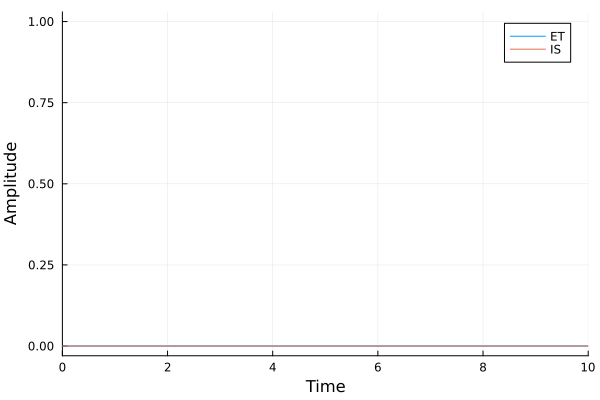

In [2]:
using DifferentialEquations

# Define parameters
τ_ET = 1.0  # Time constant for Eligibility Trace (placeholder value)
τ_IS = 1.0  # Time constant for Instructive Signal (placeholder value)
ts = 0.5    # Time of synaptic activation (placeholder value)
tp = 1.0    # Onset time of plateau potential (placeholder value)
d = 0.5     # Duration of plateau potential (placeholder value)

# Define the differential equations for ET and IS
function BTSP_model!(du, u, p, t)
    ET, IS = u
    τ_ET, τ_IS, ts, tp, d = p
    
    # Dynamics for ET
    if t == ts
        dET = 1.0  # Increase upon synaptic activation
    else
        dET = -ET/τ_ET
    end
    
    # Dynamics for IS
    if tp <= t <= tp + d
        dIS = 1.0  # Increase during plateau potential
    else
        dIS = -IS/τ_IS
    end
    
    du[1] = dET
    du[2] = dIS
end

# Initial conditions
u0 = [0.0, 0.0]  # Initial values for ET and IS

# Time span for the simulation
tspan = (0.0, 10.0)

# Solve the differential equations
prob = ODEProblem(BTSP_model!, u0, tspan, [τ_ET, τ_IS, ts, tp, d])
sol = solve(prob)

# Plot the results (assuming you have the Plots package)
using Plots
plot(sol, xlabel="Time", ylabel="Amplitude", label=["ET" "IS"])


In [3]:
max_pos = 185.
T = 185
x_t = collect(1.:max_pos)
n_ca3 = 20
tuning_peak_i = collect(LinRange(1,max_pos,n_ca3))

20-element Vector{Float64}:
   1.0
  10.68421052631579
  20.36842105263158
  30.052631578947366
  39.73684210526316
  49.421052631578945
  59.10526315789473
  68.78947368421052
  78.47368421052632
  88.1578947368421
  97.84210526315789
 107.52631578947368
 117.21052631578947
 126.89473684210526
 136.57894736842104
 146.26315789473685
 155.94736842105263
 165.63157894736844
 175.3157894736842
 185.0

In [4]:
r_max = 40
sigma = 15
r_i_t = r_max * exp.(-1/2*(tuning_peak_i .- x_t').^2 / sigma)
c = 1.
v_b = 40.
n_ca1 = 10
w_ji = ones(n_ca1, n_ca3)
v_j_t = c .* (w_ji * r_i_t) .- v_b



10×185 Matrix{Float64}:
 1.75564  1.9274  0.596772  -1.34066  …  -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066  …  -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564
 1.75564  1.9274  0.596772  -1.34066     -1.34066  0.596772  1.9274  1.75564

In [5]:
function get_d_et(tau_et, et_i, lam_et, r_i)
    (-et_i .+ lam_et .* r_i) ./ tau_et
end

function get_d_is(tau_is,is_j,lam_is,plat_j)
    (-is_j + lam_is .* plat_j) ./ tau_is
end

get_d_is (generic function with 1 method)

In [6]:
tau_et = 1.
et_i_init = zeros(n_ca3)
lam_et = 1.
et_i = et_i_init
r_i = r_i_t[:,1]
get_d_et(tau_et, et_i, lam_et, r_i)

tau_is = 1.
is_j_init = zeros(n_ca1)
is_j = is_j_init
lam_is = 1.
plat_j_t = zeros(n_ca1,T)
plat_j = plat_j_t[:,1]
get_d_is(tau_is,is_j,lam_is,plat_j)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [164]:
# morris lecar for dendrite

function sigmoid(x;a=0.,b=1.)
   1/(1+exp(-(x-a)/b))
end
function func_inf(v;v1=0,v2=1)
   1/2*(1+tanh((v-v1)/v2))
end

function func_tau(v;v1=0,v2=1)
    1/cosh((v-v1)/(2*v2))
end


function get_ml_d!(dvdn,vn,r_i,i_ext;g_ca=4.4,
            g_k=8,
            g_l=2,g_gaba=0.,
                c=20,
                E_ca=120,E_k=-84,E_l=-60,E_gaba=-60,
                v1=-1.2,v2=18,v3=2,v4=30,phi=0.04
                    )
    n_gaba = func_inf(r_i;v1=v1,v2=v2)
    m_inf = func_inf(vn[1];v1=v1,v2=v2)
    n_inf = func_inf(vn[1];v1=v3,v2=v4)
    tau_n = func_tau(vn[1];v1=v3,v2=v4)
    
    dvdn[1] = 1/c* (g_ca * m_inf *(E_ca - vn[1]) + g_k * vn[2] * (E_k - vn[1]) + g_l * (E_l - vn[1]) + g_gaba * n_gaba * (E_gaba - vn[1]) + i_ext)
#     print(n_gaba)
#     print(tau_n)
    dvdn[2] = phi/tau_n * (n_inf - vn[2])
end

    


get_ml_d! (generic function with 3 methods)

In [205]:
dvdn = zeros(2)

T = 200. # ms
dt = 0.1
Ts = collect(0:dt:T)
nT = size(Ts,1)
vn_t = zeros(2,nT)
vn_t[:,1] = [-20.,0.0]

r_i_t = zeros(nT)
i_ext_t = ones(nT) * 100.#60.
#1.

pars=Dict(:g_ca=>4.4,
    :g_k=>8.,
    :g_l =>2.,
    :g_gaba=>0.,
    :c=>20,:E_ca=>120,:E_k=>-84,
    :E_l=>-60,:E_gaba=>-60,:v1=>-1.2,:v2=>18,:v3=>2,:v4=>80,:phi=>0.01)


for tt=2:nT   
    get_ml_d!(dvdn,vn_t[:,tt-1],r_i_t[tt],i_ext_t[tt];pars...
                                    )
    vn_t[:,tt] =vn_t[:,tt-1] .+ dt * dvdn
end


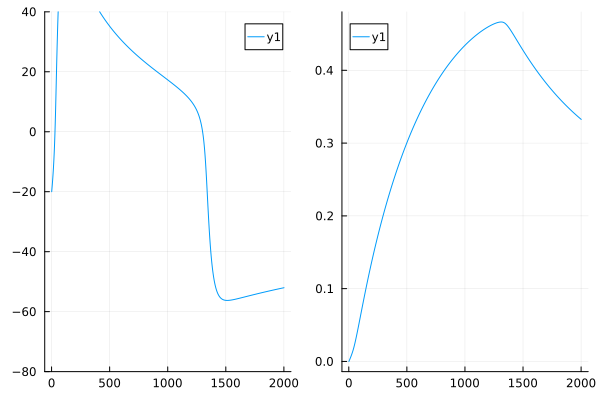

In [206]:
p=plot(vn_t[1,:],ylim=[-80,40])
p2=plot(vn_t[2,:])
plot(p,p2)
# xlims!(p,0,1000)

In [229]:
function get_ra_d!(drda,ra,r_i,i_ext;
                    tau_r=1.,tau_a=1.,
                    w=1.,b=1.,w_gaba=0.,
                    v1_r =0. ,v2_r=1.,
                    v1_a=0.,v2_a=1.,
                    v1_gaba=0.,v2_gaba=1.
                    )
    n_gaba = func_inf(r_i;v1=v1_gaba,v2=v2_gaba)
    drda[1] =1/tau_r *( -ra[1] + func_inf(w*ra[1]-b*ra[2]+i_ext-w_gaba*r_i;v1=v1_r,v2=v2_r))
    drda[2] = 1/tau_a * (-ra[2] + func_inf(ra[1];v1=v1_a,v2=v2_a))
#     println(drda[2])
end

    
    

get_ra_d! (generic function with 1 method)

In [230]:
func_inf.(0:0.1:1)

11-element Vector{Float64}:
 0.5
 0.549833997312478
 0.598687660112452
 0.6456563062257954
 0.6899744811276125
 0.7310585786300049
 0.7685247834990176
 0.8021838885585817
 0.8320183851339245
 0.8581489350995122
 0.8807970779778824

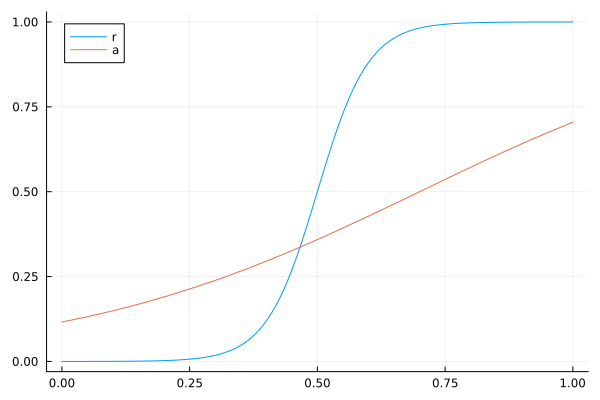

In [381]:
T = 1000. # ms
dt = 0.1
Ts = collect(0:dt:T)
nT = size(Ts,1)
ra_t = zeros(2,nT)
ra_t[:,1] = [0.2,0.0]

r_i_t = zeros(nT)
i_ext_t = ones(nT) * 0.3 #60.
drda=zeros(2)

pars=Dict(:tau_r=>1.,:tau_a=>100.,
                    :w=>1.,:b=>0.9,:w_gaba=>0.,
                    :v1_r =>0.5 ,:v2_r=>0.1,
                    :v1_a=>0.7,:v2_a=>.69)

var_l = 0:0.01:1
r_inf = func_inf.(var_l;v1=pars[:v1_r],v2=pars[:v2_r])
a_inf = func_inf.(var_l;v1=pars[:v1_a],v2=pars[:v2_a])
p=plot(var_l,r_inf,label="r")
plot!(p,var_l,a_inf,label="a")



In [382]:
for tt=2:nT   
    get_ra_d!(drda,ra_t[:,tt-1],r_i_t[tt],i_ext_t[tt];pars...
                                    )
    ra_t[:,tt] =ra_t[:,tt-1] .+ dt * drda
end


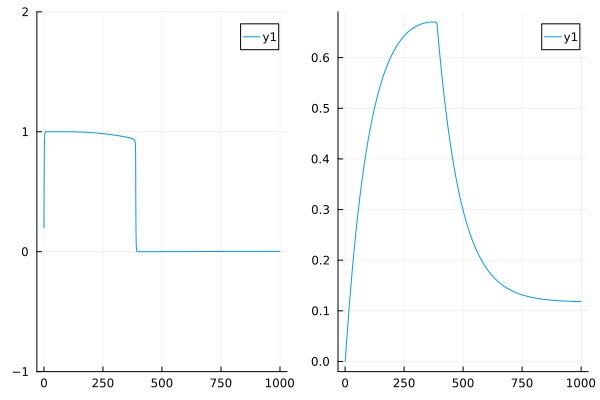

In [383]:
p=plot(Ts,ra_t[1,:],ylim=[-1,2])
p2=plot(Ts,ra_t[2,:])
plot(p,p2)
# xlims!(p,0,1000)

In [371]:
function get_ml_d!(dvdn,vn,r_i,i_ext;g_ca=4.4,
            g_k=8,
            g_l=2,g_gaba=0.,
                c=20,
                E_ca=120,E_k=-84,E_l=-60,E_gaba=-60,
                v1=-1.2,v2=18,v3=2,v4=30,phi=0.04,
            tau_n
                    )
    n_gaba = func_inf(r_i;v1=v1,v2=v2)
    m_inf = func_inf(vn[1];v1=v1,v2=v2)
    n_inf = func_inf(vn[1];v1=v3,v2=v4)
    tau_n = func_tau(vn[1];v1=v3,v2=v4)
    
    dvdn[1] = 1/c* (g_ca * m_inf *(E_ca - vn[1]) + g_k * vn[2] * (E_k - vn[1]) + g_l * (E_l - vn[1]) + g_gaba * n_gaba * (E_gaba - vn[1]) + i_ext)
    dvdn[2] = phi/tau_n * (n_inf - vn[2])
end

get_ml_d! (generic function with 3 methods)

In [22]:
nT

(1,)

In [18]:
vn

2-element Vector{Float64}:
 0.0
 0.0

In [11]:
v = 0.
n = 0.5
r_i = 0.5
i_ext=0.
g_ca=1.
g_k=1.
g_l = 1.
g_gaba=1.
tau_n=1.
get_ml_d(v,n,r_i,i_ext,g_ca,g_k,g_l,g_gaba;
                E_ca=100,E_k=-80,E_l=-65,
                    )

1.0

2-element Vector{Float64}:
 -102.51880761095032
    0.0

In [13]:
vn0 = [-40;0.]
tspan = (0.,100.)
prob = ODEProblem(get_ml_d!, vn0,tspan)

LoadError: All methods for the model function `f` had too many arguments. For example,
an ODEProblem `f` must define either `f(u,p,t)` or `f(du,u,p,t)`. This error
can be thrown if you define an ODE model for example as `f(du,u,p1,p2,t)`.
For more information on the required number of arguments for the function
you were defining, consult the documentation for the `SciMLProblem` or
`SciMLFunction` type that was being constructed.

A common reason for this occurrence is due to following the MATLAB or SciPy
convention for parameter passing, i.e. to add each parameter as an argument.
In the SciML convention, if you wish to pass multiple parameters, use a
struct or other collection to hold the parameters. For example, here is the
parameterized Lorenz equation:

```julia
function lorenz(du,u,p,t)
  du[1] = p[1]*(u[2]-u[1])
  du[2] = u[1]*(p[2]-u[3]) - u[2]
  du[3] = u[1]*u[2] - p[3]*u[3]
 end
 u0 = [1.0;0.0;0.0]
 p = [10.0,28.0,8/3]
 tspan = (0.0,100.0)
 prob = ODEProblem(lorenz,u0,tspan,p)
```

Notice that `f` is defined with a single `p`, an array which matches the definition
of the `p` in the `ODEProblem`. Note that `p` can be any Julia struct.

Offending function: [31m[1mf[22m[39m
Methods:
# 1 method for generic function "get_ml_d!" from [35mMain[39m:
 [1] get_ml_d!([90mdvdn[39m, [90mv[39m, [90mn[39m, [90mr_i[39m, [90mi_ext[39m, [90mg_ca[39m, [90mg_k[39m, [90mg_l[39m, [90mg_gaba[39m; E_ca, E_k, E_l, E_gaba)
[90m     @[39m [90m[4mIn[12]:30[24m[39m


In [ ]:
def eulder

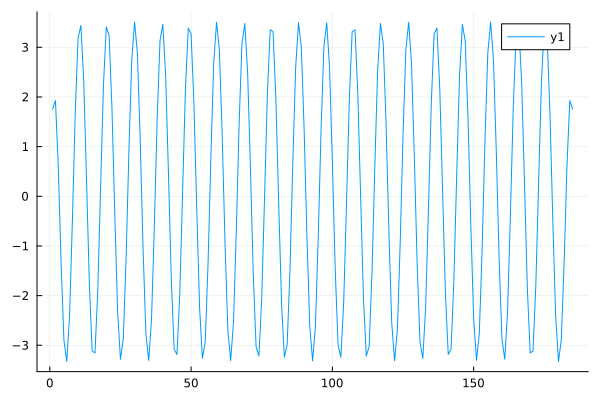

In [14]:
plot(v_j[1,:])

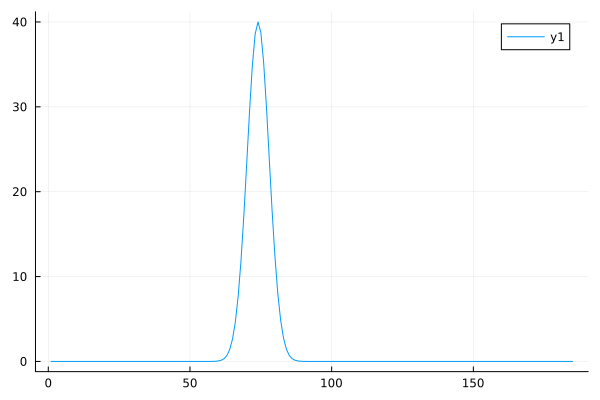

In [45]:
plot(r_i[80,:])